## Performance Measures of Time Series Forecasting

Time series forecasting is a way to predict future behavior of the data we currently have. Time series models provides different ways of handling the prediction based  on the patterns of the data. However, there is only one way of knowing how accurate these predictions would be. It is comparing the predicted data with the real data. 

![](measure.jpg)

Using some part of the data for training the model and saving another part, usually much smaller one, is general practice in time series forecasting. Although, there are many different ways of choosing the train-test pieces, at the end of the prediction, it is always the predicted data and test data to be compared as the accuracy measure. It is imperative to not to use the testing data in the training to get correct result.
There are a few measures to obtain from comparison of predicted and expected (real) data. Those are;

-	Residual Forecasted Error 
-	Mean Forecast Error (or Forecast Bias)
-	Mean Absolute Error (MAE)
-	Mean Squared Error (MSE)
-	Root Mean Squared Error (RMSE)

### Residual Forecast Error (RFE)
Residual Forecast Error is the difference between the forecasted data and the actaul data for the same time stamp in the dataset. For each data point in the test set, it is sum of the real value minus the predicted value. It could be positive or negative for different points. This might be tricky because a very large positive mistake can be cancelled out by another large negative mistake. When add them up the number we get is the Residual Forecast Error. Since the unit is the same with the values in the dataset, we may draw conclusion easily. If the number is close or equal to “0”, that indicates the model’s predictions are very accurate. 

### Mean Forecast Error (or Forecast Bias)
Residual Forecast Error is the sum of Forecast Errors. The average of the forecast errors is the Mean Forecast Error (MFE). So for the n size of the test data, the formula is RFE / n. It can be a positive or a negative value. If it is positive, it means, the model tends to over forecast and it is called positive error. If it is negative, that means the model tends to under forecasts and it is called negative error. This number is also called as Forecast Bias. A close number to zero suggests that model is unbiased. 
### Mean Absolute Error (MAE)
For Mean Absolute Error, all errors (negative or positive) count as positive. This gives a real picture of total errors since they do not cancell each other out.  The average of absolute value of errors gives as Mean Absolute Error.

### Mean Squared Error (MSE)
The Mean Squared Error is the average squared forecas errors. The reaoson to square the errors is to enphesize the large error values.  So it punished the models that have large wrong predictions.  The performense show worse with this measure. 

### Root Mean Squared Error (RMSE)
Last but not least, the Root Mean Squared Error is calculated by taking the square root of Mean Squared Error.  This operation brings the unit back to same with the normal and we can get better intuition of the accuracy of the model. Zero is the best and as it gets bigger the accuracy gets lover.  
Let us see all of these measeure calculations in a real example. 





In [241]:
# Import necessary libraries
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

Text(0.5, 1.0, 'Number of Female Born')

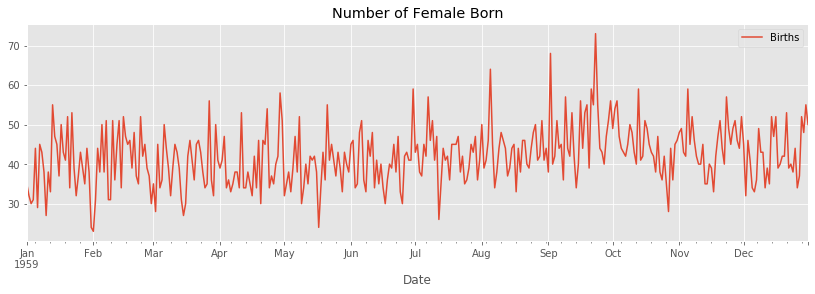

In [242]:
data=pd.read_csv("data.csv")
data.Date = pd.to_datetime(data.Date)
data.set_index('Date', inplace = True)
data.plot(figsize=(14,4))
plt.title("Number of Female Born")

In [202]:
#train test split
size = int(len(data) * 0.66)
train, test = data[0:size], data[size:len(data)]                        

In [239]:
#fit the model
model2=sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 30),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
output=model2.fit()

#Predict
prediction=output.predict(start="1959-08-29", end="1959-12-29")

<Figure size 1008x288 with 0 Axes>

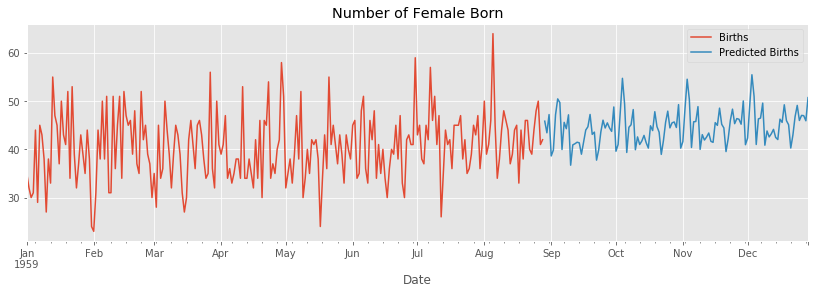

In [245]:
#plot train and predicted data
plt.figure(figsize=(14,4))
ax=train.plot(figsize=(14,4), label="Observed")
prediction.plot(label="Predicted Births")
plt.title("Number of Female Born")
plt.legend()

<Figure size 1008x288 with 0 Axes>

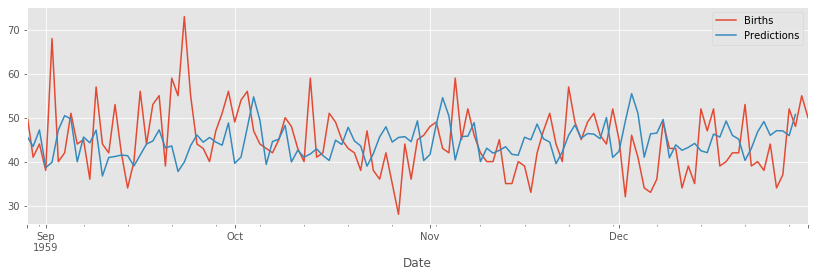

In [244]:
#plot test and predicted data
plt.figure(figsize=(14,4))
ax=test.plot(figsize=(14,4))
prediction.plot(label="Predictions")
plt.legend()

In [227]:
expected=test.Births
predicted=prediction[0]

In [228]:
#Residual Forecast Error
RFE= sum(expected - predicted)
RFE

-116.65445674494893

In [229]:
#Mean Forecast Error
MRFE=np.mean(expected - predicted)
MRFE

-0.9332356539595914

In [230]:
#Mean Absolute Error
MAE=np.mean(abs(expected - predicted))
MAE

5.88657090125527

In [231]:
#Mean Squared Error
MSE = sum(np.square(expected - predicted))
MSE

6828.898098227673

In [232]:
#Root Mean Squared Error
RMSE = np.sqrt(sum(np.square(expected - predicted)))
RMSE

82.63714720528337

In [235]:
#scikit metrics has also mse and mae methods you can use
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(expected, predicted)
mean_absolute_error(expected, predicted)

TypeError: Singleton array 45.84523565395959 cannot be considered a valid collection.

In [233]:
MAE/np.mean(expected)

0.13106899940450817

As noted earlier, the time series has spikes reflecting an obvious seasonality pattern, as well as an overall increasing trend.

In [192]:
# fit and run the model
model=sma.ARIMA(train, (1,1,1))
model_fit=model.fit()

In [193]:
#predict 
predict=model_fit.predict(start="1959-06-29", end="1959-12-29")

<Figure size 1296x288 with 0 Axes>

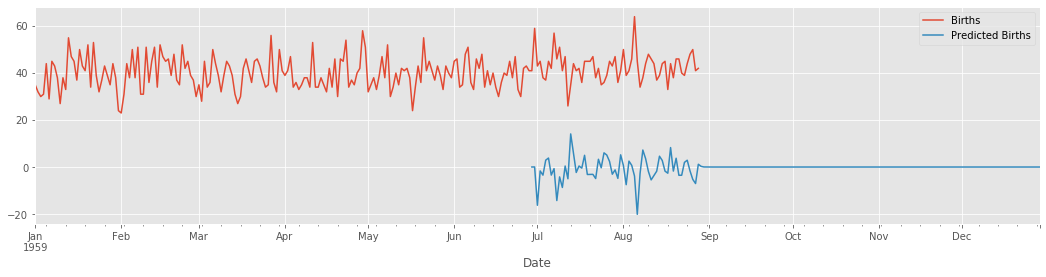

In [194]:
plt.figure(figsize=(18,4))
ax=train.plot(figsize=(18,4), label="Observed")
predict.plot(label="Predicted Births")
plt.legend()

## The ARIMA Time Series Model

One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for **AutoregRessive Integrated Moving Average**. ARIMA is a model that can be fitted to time series data in order to better understand or predict future points in the series.

Let's have a quick introduction to ARIMA. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

### Number of AR (Auto-Regressive) terms (p): 

`p` is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to rain tomorrow if it has been raining for past 3 days. AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

### Number of Differences (d):

`d` is the **Integrated** component of an ARIMA model. This value is concerned with the amount of differencing as it identifies the number of lag values to subtract from the current observation. Intuitively, this would be similar to stating that it is likely to rain tomorrow if the difference in amount of rain in the last *n* days is small. 

### Number of MA (Moving Average) terms (q): 

`q` is the moving average part of the model which is used to set the error of the model as a linear combination of the error values observed at previous time points in the past. MA terms form lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where `e(i)` is the difference between the moving average at ith instant and actual value.

These three distinct integer values, (p, d, q), are used to parametrize ARIMA models. Because of that, ARIMA models are denoted with the notation `ARIMA(p, d, q)`. Together these three parameters account for seasonality, trend, and noise in datasets:

* `(p, d, q)` are the non-seasonal parameters described above.
* `(P, D, Q)` follow the same definition but are applied to the seasonal component of the time series. 
* The term `s` is the periodicity of the time series (4 for quarterly periods, 12 for yearly periods, etc.).

A detailed article on these parameters is available [HERE](https://www.quantstart.com/articles/Autoregressive-Integrated-Moving-Average-ARIMA-p-d-q-Models-for-Time-Series-Analysis).

The seasonal ARIMA method can appear daunting because of the multiple tuning parameters involved. In the next section, we will describe how to automate the process of identifying the optimal set of parameters for the seasonal ARIMA time series model.

## Parameter Selection for the ARIMA Time Series Model


The first step towards fitting an ARIMA model is to find the values of `ARIMA(p,d,q)(P,D,Q)s` that produce the desired output. Selection of these parameters requires domain expertise and time.  We shall first generate small ranges of these parameters and use a "grid search" to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal ARIMA model with the `SARIMAX()` function from the statsmodels module and assess its overall quality. 

`SARIMAX` detailed documentation can be viewed [here](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html)

Let's begin by generating example combination of parameters that we wish to use.

1. Define p,q and d parameters to take any value from 0/1 using `range()` function. (Note: We can try larger values which can make our model computationally expensive to run, you can try this as an additional experiment)

2. Generate combinations for `(p,d,q)` using `itertools.product`.
3. Similarly, generate seasonal combinations as `(p,d,q)s`. Use s = 12 (constant)
4. Print some example combinations for seasonal ARIMA

In [57]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))


# Generate all different combinations of seasonal p, q and q triplets (use 12 for frequency)
pdqs = [[x[0],x[1],x[2],12] for x in pdq]
pdqs

[[0, 0, 0, 12],
 [0, 0, 1, 12],
 [0, 1, 0, 12],
 [0, 1, 1, 12],
 [1, 0, 0, 12],
 [1, 0, 1, 12],
 [1, 1, 0, 12],
 [1, 1, 1, 12]]

## AIC (Akaike Information Criterion) as Regularization Measure


For evaluating the model, we shall use the AIC (Akaike Information Criterion) value, which is provided by ARIMA models fitted using `statsmodels` library. The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection. 

A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value. To achieve this, perform following tasks:

1. Initialize an empty list to store results
2. iterate through all the paramaters in pdq with parameters in seasonal pdq (nested loop ) to create a grid
3. Run `SARIMAX` from statsmodels for each iteration. Details can be found [HERE](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html). Set `enforce_stationarity` and `enforce_invertibility` to False. 
4. Get the results in each iteration with `model.fit()` and store the AIC values. 
5. Find the lowest AIC and select parameters for further analysis. 

NOTE: 
* Integrate exception handling with `continue`. 
* An overview of Akaike Information Criterion can be viewed [HERE](http://www.statisticshowto.com/akaikes-information-criterion/)



In [98]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
     
            mod = sm.tsa.statespace.SARIMAX(CO2,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
      
            
# ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.34362403487
# ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.7111727637512
# ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320024
#     .
#     .
#     .
#     .
# ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:327.9049164493077
# ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:444.1243686483202
# ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:277.78021965631604    

ARIMA (0, 0, 0) x [0, 0, 0, 12]12 : AIC Calculated =7612.583429881011
ARIMA (0, 0, 0) x [0, 0, 1, 12]12 : AIC Calculated =6787.343624041216
ARIMA (0, 0, 0) x [0, 1, 0, 12]12 : AIC Calculated =1854.828234141261
ARIMA (0, 0, 0) x [0, 1, 1, 12]12 : AIC Calculated =1596.7111727643685
ARIMA (0, 0, 0) x [1, 0, 0, 12]12 : AIC Calculated =1058.9388921320035
ARIMA (0, 0, 0) x [1, 0, 1, 12]12 : AIC Calculated =1056.287853412378
ARIMA (0, 0, 0) x [1, 1, 0, 12]12 : AIC Calculated =1361.6578978073326
ARIMA (0, 0, 0) x [1, 1, 1, 12]12 : AIC Calculated =1044.7647912845403
ARIMA (0, 0, 1) x [0, 0, 0, 12]12 : AIC Calculated =6881.04875557057
ARIMA (0, 0, 1) x [0, 0, 1, 12]12 : AIC Calculated =6072.662327745966
ARIMA (0, 0, 1) x [0, 1, 0, 12]12 : AIC Calculated =1379.194106703013
ARIMA (0, 0, 1) x [0, 1, 1, 12]12 : AIC Calculated =1241.4174716855446


/Users/kaan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 1) x [1, 0, 0, 12]12 : AIC Calculated =1091.803613370445


/Users/kaan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 1) x [1, 0, 1, 12]12 : AIC Calculated =842.3662244792042
ARIMA (0, 0, 1) x [1, 1, 0, 12]12 : AIC Calculated =1119.595789359847
ARIMA (0, 0, 1) x [1, 1, 1, 12]12 : AIC Calculated =807.0912988415766
ARIMA (0, 1, 0) x [0, 0, 0, 12]12 : AIC Calculated =1675.8086923024293
ARIMA (0, 1, 0) x [0, 0, 1, 12]12 : AIC Calculated =1240.2211199194048
ARIMA (0, 1, 0) x [0, 1, 0, 12]12 : AIC Calculated =633.4425587793727
ARIMA (0, 1, 0) x [0, 1, 1, 12]12 : AIC Calculated =337.79385506001574
ARIMA (0, 1, 0) x [1, 0, 0, 12]12 : AIC Calculated =619.9501759055303
ARIMA (0, 1, 0) x [1, 0, 1, 12]12 : AIC Calculated =376.92837596911323
ARIMA (0, 1, 0) x [1, 1, 0, 12]12 : AIC Calculated =478.3296907141958
ARIMA (0, 1, 0) x [1, 1, 1, 12]12 : AIC Calculated =323.32466847942965
ARIMA (0, 1, 1) x [0, 0, 0, 12]12 : AIC Calculated =1371.1872602337162
ARIMA (0, 1, 1) x [0, 0, 1, 12]12 : AIC Calculated =1101.841073430242
ARIMA (0, 1, 1) x [0, 1, 0, 12]12 : AIC Calculated =587.9479709797133
ARIMA (0, 1, 1

/Users/kaan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 0) x [0, 0, 1, 12]12 : AIC Calculated =1241.9354193349918
ARIMA (1, 0, 0) x [0, 1, 0, 12]12 : AIC Calculated =624.2602350139374
ARIMA (1, 0, 0) x [0, 1, 1, 12]12 : AIC Calculated =341.289660914842
ARIMA (1, 0, 0) x [1, 0, 0, 12]12 : AIC Calculated =579.3896724742635


/Users/kaan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 0) x [1, 0, 1, 12]12 : AIC Calculated =370.5912208502815
ARIMA (1, 0, 0) x [1, 1, 0, 12]12 : AIC Calculated =476.0500438935155
ARIMA (1, 0, 0) x [1, 1, 1, 12]12 : AIC Calculated =329.58449923644866
ARIMA (1, 0, 1) x [0, 0, 0, 12]12 : AIC Calculated =1372.6085881637048
ARIMA (1, 0, 1) x [0, 0, 1, 12]12 : AIC Calculated =1199.4888131650146
ARIMA (1, 0, 1) x [0, 1, 0, 12]12 : AIC Calculated =586.4485732611977
ARIMA (1, 0, 1) x [0, 1, 1, 12]12 : AIC Calculated =305.6273827828469


/Users/kaan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x [1, 0, 0, 12]12 : AIC Calculated =586.5102388685623


/Users/kaan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x [1, 0, 1, 12]12 : AIC Calculated =387.80253940204125
ARIMA (1, 0, 1) x [1, 1, 0, 12]12 : AIC Calculated =433.5469464471814
ARIMA (1, 0, 1) x [1, 1, 1, 12]12 : AIC Calculated =285.76517560109795
ARIMA (1, 1, 0) x [0, 0, 0, 12]12 : AIC Calculated =1324.311112732459
ARIMA (1, 1, 0) x [0, 0, 1, 12]12 : AIC Calculated =1060.9351914433375
ARIMA (1, 1, 0) x [0, 1, 0, 12]12 : AIC Calculated =600.7412683075383
ARIMA (1, 1, 0) x [0, 1, 1, 12]12 : AIC Calculated =312.1329632649396
ARIMA (1, 1, 0) x [1, 0, 0, 12]12 : AIC Calculated =593.6637754907254
ARIMA (1, 1, 0) x [1, 0, 1, 12]12 : AIC Calculated =349.20913725642725
ARIMA (1, 1, 0) x [1, 1, 0, 12]12 : AIC Calculated =440.1375921963399
ARIMA (1, 1, 0) x [1, 1, 1, 12]12 : AIC Calculated =293.74262214587446
ARIMA (1, 1, 1) x [0, 0, 0, 12]12 : AIC Calculated =1262.6545542479798
ARIMA (1, 1, 1) x [0, 0, 1, 12]12 : AIC Calculated =1052.0636724058888
ARIMA (1, 1, 1) x [0, 1, 0, 12]12 : AIC Calculated =581.3099934454746
ARIMA (1, 1, 

In [99]:
# Find the parameters with minimal AIC value.

test=pd.DataFrame(ans)
print( test[test[2]==test[2].min()] )

# pdq         (1, 1, 1)
# pdqs    (1, 1, 1, 12)
# aic            277.78
# Name: 59, dtype: object

            0              1           2
63  (1, 1, 1)  [1, 1, 1, 12]  277.780219


The output of our code suggests that `ARIMA(1, 1, 1)x(1, 1, 1, 12)` yields the lowest AIC value of `277.78`. We should therefore consider this to be optimal option out of all the models we have considered.

## Fitting an ARIMA Time Series Model

Using grid search, we have identified the set of parameters that produces the best fitting model to our time series data. We can proceed to analyze this particular model in more depth.

We'll start by plugging the optimal parameter values into a new SARIMAX model.

In [101]:
# plug the optimal parameter values into a new SARIMAX model.
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(CO2,
                                order=(1, 1, 1),
                                seasonal_order=(1,1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

# Fit the model and print results

# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ar.L1          0.3182      0.092      3.442      0.001       0.137       0.499
# ma.L1         -0.6254      0.077     -8.163      0.000      -0.776      -0.475
# ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
# ma.S.L12      -0.8769      0.026    -33.812      0.000      -0.928      -0.826
# sigma2         0.0972      0.004     22.632      0.000       0.089       0.106
# ==============================================================================

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3182      0.092      3.442      0.001       0.137       0.499
ma.L1         -0.6254      0.077     -8.163      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.812      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.632      0.000       0.089       0.106


The model returns a lot of information, but we'll focus only on the table of coefficients. The `coef` column above shows the importance of each feature and how each one impacts the time series patterns.  The $P>|z|$ provides  the significance of each feature weight. 

For our time-series, we see that each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.

Next, we shall run model diagnostics to ensure that none of the assumptions made by the model have been violated. 


The `plot_diagnostics()` function on ARIMA output below:

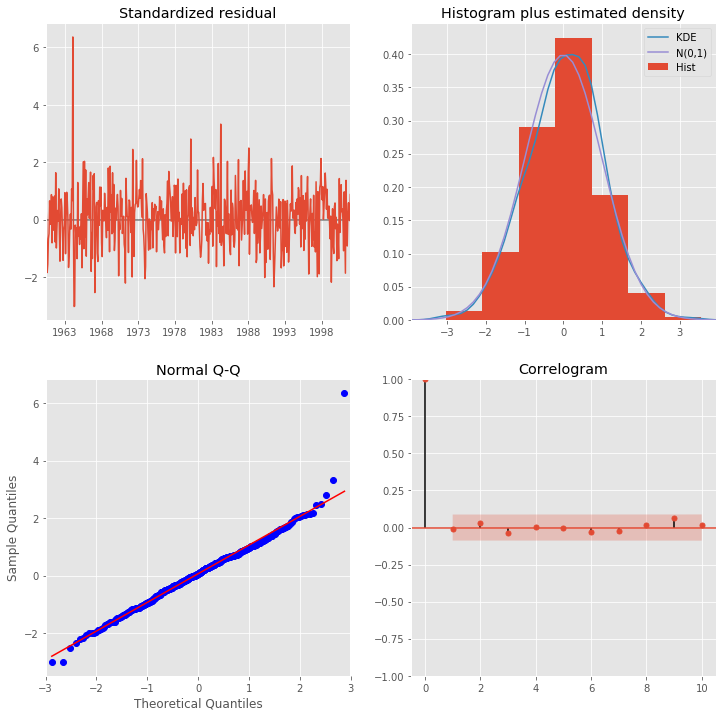

In [102]:
# Use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(12,12))
plt.show()

The purpose here to ensure that residuals remain uncorrelated, normally distributed having zero mean. In the absence of these assumptions, we can not move forward and need further tweaking of the model. 

Let's check for these assumptions from diagnostics plots.

* In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.

* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

* The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Those observations lead us to conclude that our model produces has no correlations and provides a satisfactory fit to help forecast future values.


## Validating the Model

### One-step Ahead Forecasting

In order to validate the model, we start by comparing predicted values to real values of the time series, which will help us understand the accuracy of our forecasts. 

The `get_prediction()` and `conf_int()` attributes allow us to obtain the values and associated confidence intervals for forecasts of the time series.


[Documentation of `get_predictions()`](http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.get_prediction.html)

[Documentation for `conf_int()`](http://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARIMAResults.conf_int.html)

* Get the predictions from 1st January 1998 till 2002 ( end of time-series)

* Get the confidence intervals for all predictions.

* For `get_predictions()`, set the `dynamic` parameter to False to ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

In [103]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals.

pred = output.get_prediction(start=pd.to_datetime(('1998-01-01')), dynamic=False)
pred_conf = pred.conf_int()

We shall now plot the real and forecasted values of the CO2 time series to assess how well we did. 

* Plot the observed values from the dataset, starting at 1990.
* Use `predicted_mean.plot()` with `prediction` to plot predictions.
* Plot the confidence intervals overlapping the predicted values.


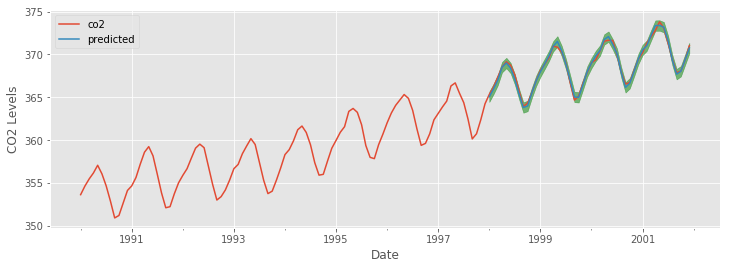

In [156]:
# Plot real vs predicted values along with confidence interval


ax = CO2['1990':].plot(label='observed',figsize=(12,4))
pred.predicted_mean.plot(figsize=(12,4), label="predicted")
# Plot observed values
plt.legend()
# Plot predicted values

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)
# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

The forecasts align with the true values  as seen above,with overall increase trend. We shall also check for the accuracy of our forecasts using  **MSE (Mean Squared Error)**. This will provide us with the average error of our forecasts. For each predicted value, we compute its distance to the true value and square the result. The results need to be squared so that positive/negative differences do not cancel each other out when we compute the overall mean.

In [191]:
# Get the Real and predicted values
CO2_forecasted = pred.predicted_mean   #this is a list
CO2_truth = CO2['1998-01-01':]     # this is still a datagrame. consider


# Compute the mean square error


mse = ((CO2_forecasted - CO2_truth.co2) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#CO2_forecasted[0] - CO2_truth.co2[0]

# The Mean Squared Error of our forecasts is 0.07

The Mean Squared Error of our forecasts is 0.07


The MSE of our one-step ahead forecasts yields a value of 0.07, which is very low as it is close to 0. An MSE of 0 would that the estimator is predicting observations of the parameter with perfect accuracy, which would be an ideal scenario but it not typically possible.

### Dynamic Forecasting

We can achieve a deeper insight into model's predictive power using dynamic forecasts. In this case, we only use information from the time series up to a certain point, and after that, forecasts are generated using values from previous forecasted time points.

Repeat above calculation for predictions post 1998. Use Dynamic forecasting by setting `dynamic` to True.

In [192]:
# Get dynamic predictions with confidence intervals as above.
pred_dynamic = output.get_prediction(start=pd.to_datetime(('1998-01-01')), dynamic=True)
pred_dynamic_conf = pred.conf_int()


Plotting the observed and forecasted values of the time series, we see that the overall forecasts are accurate even when using dynamic forecasts. All forecasted values (red line) match pretty closely to the ground truth (blue line), and are well within the confidence intervals of our forecast.

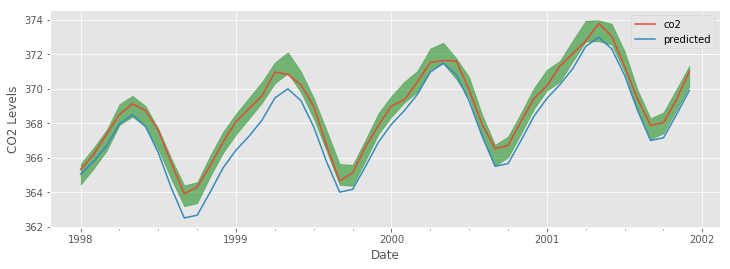

In [196]:
# Plot the dynamic forecast with confidence intervals as above


ax = CO2['1998':].plot(label='observed',figsize=(12,4))
pred_dynamic.predicted_mean.plot(figsize=(12,4), label="predicted")
# Plot observed values
plt.legend()
# Plot predicted values

# Plot the range for confidence intervals
ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.5)
# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()


Once again, we quantify the predictive performance of our forecasts by computing the MSE.

In [195]:
# Extract the predicted and true values of our time series
CO2_forecasted = pred_dynamic.predicted_mean   #this is a list
CO2_truth = CO2['1998-01-01':]     # this is still a datagrame. consider


# Compute the mean square error


mse = ((CO2_forecasted - CO2_truth.co2) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# The Mean Squared Error of our forecasts is 1.01

The Mean Squared Error of our forecasts is 1.01


The predicted values obtained from the dynamic forecasts yield an MSE of 1.01. This is slightly higher than the one-step ahead, which is to be expected given that we are relying on less historical data from the time series.

Both the one-step ahead and dynamic forecasts confirm that this time series model is valid. However, much of the interest around time series forecasting is the ability to forecast future values way ahead in time.


## Producing and Visualizing Forecasts

We will now describe how to leverage our seasonal ARIMA time series model to forecast future values. The `get_forecast()` attribute of our time series object can compute forecasted values for a specified number of steps ahead.

In [14]:
# Get forecast 500 steps ahead in future
prediction = None
# Get confidence intervals of forecasts
pred_conf = None

We can use the output of this code to plot the time series and forecasts of its future values.



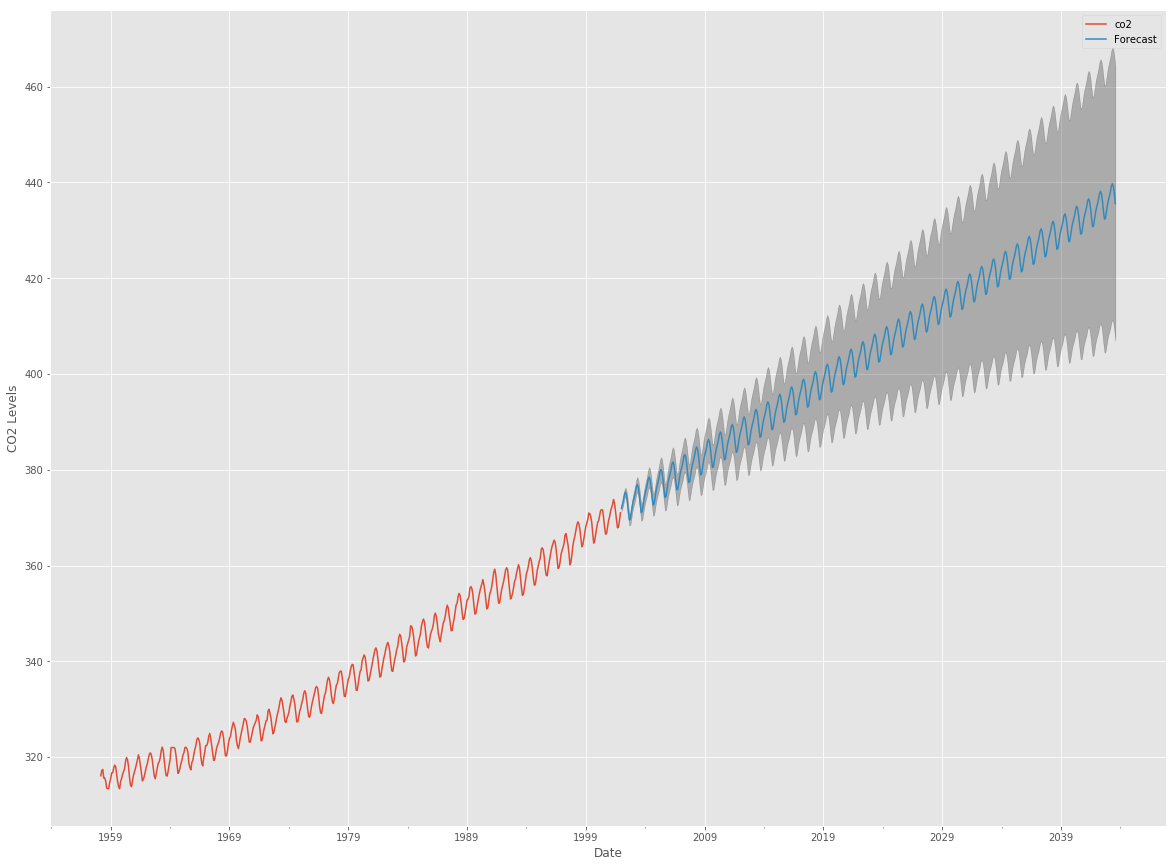

In [198]:
# Plot future predictions with confidence intervals
prediction = output.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

# Plot future predictions with confidence intervals

ax = CO2.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

Both the forecasts and associated confidence interval that we have generated can now be used to further understand the time series and foresee what to expect. Our forecasts show that the time series is expected to continue increasing at a steady pace.

As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

## Bonus Exercises

* Change the start date of your dynamic forecasts to see how this affects the overall quality of your forecasts.
* Try more combinations of parameters to see if you can improve the goodness-of-fit of your model.
* Select a different metric to select the best model. For example, we used the AIC measure to find the best model, but you could seek to optimize the out-of-sample mean square error instead.


## Summary

In this lab, we described how to implement a seasonal ARIMA model in Python. We made extensive use of the pandas and statsmodels libraries and showed how to run model diagnostics, as well as how to produce forecasts of the CO2 time series.